# Solution to Exercise 2: Leaky integrate-and-fire (LIF) neuron

## Pen and paper exercises
__(i)__ If $V=0$ at a time zero, it will with a constant input current $I$ reach the threshold $V=\theta$ after at time $t=t^*$ given by 

\begin{equation}
\theta = R\,I\,\Big(1-e^{-t^*/\tau_m} \Big)
\tag{1}
\end{equation}

In the present LIF model, the neuron will fire a spike when $V=\theta$, and afterward the potential is immediately reset to $V=0$. With a constant current input $I$, the time between each spike will thus according to equation 1 be:

\begin{equation}
t^* = - \tau_m \ln \Big( 1- \frac{\theta}{RI} \Big) = - \tau_m \ln \Big(\frac{RI-\theta}{RI} \Big).
\tag{2}
\end{equation}

The firing rate $f$ will be the inverse of the time $t^*$ between two spikes, that is,

\begin{equation}
f = \frac{1}{t^*} = - \frac{1}{\tau_m} \frac{1}{\ln \Big(\frac{RI - \theta}{RI} \Big)}
\tag{3}
\end{equation}

This formula looks a bit 'ugly', but we can learn a couple of things about the $f-I$ curve from it prior to plotting:

* For $RI < \theta$, the argument inside the logarithm becomes a negative number. The logarithm of a negative number is not defined, signalling that the formula is not applicable here. In this situation the current $I$ is so small that the maximum membrane potential $V_\text{max}=RI$ is below the threshold. Thus there will be no firing at all and $f=0$

* Firing can only occur for $RI > \theta$, so the input current will have to be larger than the threshold current $I_\text{thresh}=\theta/R$ for firing to occur.

A sketch of the $f-I$ curve is seen in Figure 1 (first figure generated by code below). Explanation of the detailed shape requires further analysis (see below), but at least the clear threshold behaviour can be understood from the above argument.

__(ii)__ We can expect the threshold current to be lower as the noise current occasionally will push the membrane potential above threshold, even for input currents that are in themselves too low.

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def find_FI_analytically(showplot=True):

    R = 40e-3
    tau_m = 10.
    theta = 15.
    I = np.linspace(theta / R, 700, 1000)
    F = 1000 / (tau_m * np.log(1 / (1 - theta / (R * I))))  # Firing rate in spikes / s
    if showplot:
        plt.figure()
        plt.xticks([])
        plt.yticks([])
        plt.plot(I, F, 'k')
        plt.xlabel('Input current [pA]')
        plt.ylabel('Firing rate [spikes / s]')
        plt.xlim(200, 700)
        plt.savefig('exercise_2_1.png')
    return I, F

In [17]:
def find_firing_rate_numerically(I0=400, showplot=True, noisy=False):

    R = 40e-3
    tau_m = 10.
    theta = 15.
    h = 0.1
    T = 1000
    v_init = 0
    v_reset = 0
    num_tsteps = int(T / h + 1)
    t = np.linspace(0, T, num_tsteps)
    v = np.zeros(num_tsteps)
    v[0] = v_init
    spike_idxs = []
    if noisy:
        I = I0 * (np.ones(num_tsteps) + np.random.normal(0, 0.4, size=num_tsteps))
    else:
        I = I0 * np.ones(num_tsteps)

    for n in range(num_tsteps - 1):
        v[n + 1] = v[n] + h / tau_m * (-v[n] + R * I[n])
        if v[n + 1] >= theta:
            v[n + 1] = v_reset
            spike_idxs.append(n + 1)
    if showplot:
        plt.figure()
        plt.plot(t, v)
        plt.plot(t[spike_idxs], (theta + 1) * np.ones(len(spike_idxs)), '*', ms=10)
        plt.ylim([0, 18])
        plt.xlabel('Time [ms]')
        plt.ylabel('Membrane potential')
        plt.savefig('exercise_2_3.png')
    return len(spike_idxs) / (T / 1000.)

In [18]:
def exercise_2_4():
    Is = np.linspace(200, 700, 200)
    F_clean = np.zeros(len(Is))
    F_noisy = np.zeros(len(Is))

    for idx in range(len(Is)):
        F_clean[idx] = find_firing_rate_numerically(I0=Is[idx], showplot=False)
        F_noisy[idx] = find_firing_rate_numerically(I0=Is[idx], showplot=False, noisy=True)

    I, F = find_FI_analytically(showplot=False)

    plt.figure()
    plt.plot(Is, F_clean, label='Clean numerical', lw=2)
    plt.plot(Is, F_noisy, label='Noisy numerical', lw=2)
    plt.plot(I, F, '--', label='Analytic', lw=2)

    plt.xlabel('Input current [pA]')
    plt.ylabel('Firing rate [spikes / s]')
    plt.legend(loc=0, frameon=False)
    plt.xlim(200, 700)
    plt.savefig('exercise_2_4.png')

In [19]:
def exercise_2_3():
    find_firing_rate_numerically(I0=400, showplot=True)

In [20]:
def exercise_2_1():
    find_FI_analytically(showplot=True)

/tmp/ipykernel_7872/879104247.py:7: RuntimeWarning: divide by zero encountered in divide
  F = 1000 / (tau_m * np.log(1 / (1 - theta / (R * I))))  # Firing rate in spikes / s


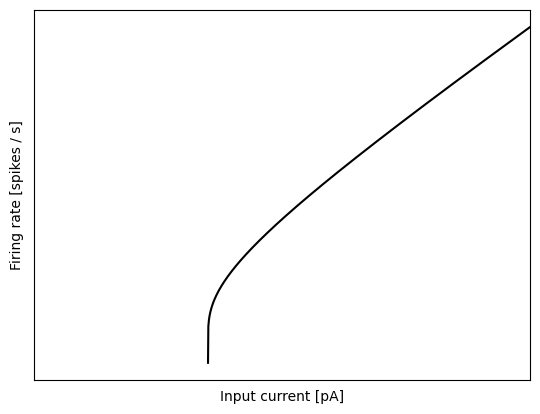

In [21]:
exercise_2_1()

## Python exercises

Code for solving the exercises were given in the function definitions above.

__(iii)__ Run __`exercise_2_3()`__ to see example solution. In the plot below (Figure 2 if all cells were run in successive order), the blue line shows the membrane potential, and the orange stars mark the spikes.

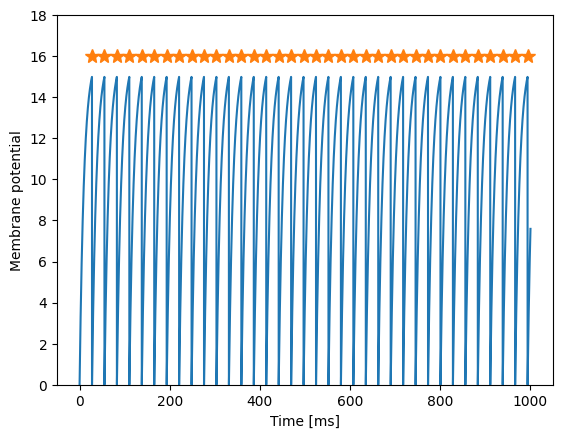

In [22]:
exercise_2_3()

__(iv)__ Run __`exercise_2_4()`__ to see example solution. The green curve is from the analytical solution in equation 3, while the blue and green line are numerical solutions from problems (iv) and (v), respectively. We here see clearly that noise lowers the firing threshold.

/tmp/ipykernel_7872/879104247.py:7: RuntimeWarning: divide by zero encountered in divide
  F = 1000 / (tau_m * np.log(1 / (1 - theta / (R * I))))  # Firing rate in spikes / s


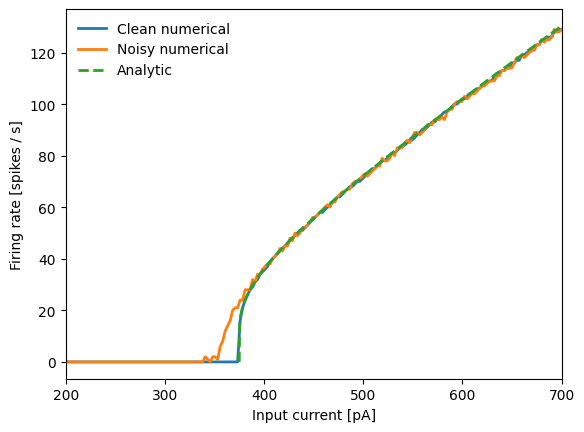

In [23]:
exercise_2_4()